# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Linear Regression From Scratch </p>

In [1]:
class LR_from_scratch:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self, X_train, y_train):
        num= 0
        den= 0
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)
            
    def predict(self, X_test):
        print(X_test)
        return self.m * X_test + self.b

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Packages </p>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [3]:
df= pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.shape

(30, 3)

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;"> Exploratory Data Analysis </p>

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.sample(3)

,YearsExperience,Salary
0,1.2,39344.0
27,9.7,112636.0
12,4.1,56958.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Text(0, 0.5, 'Salary (in Rupees)')

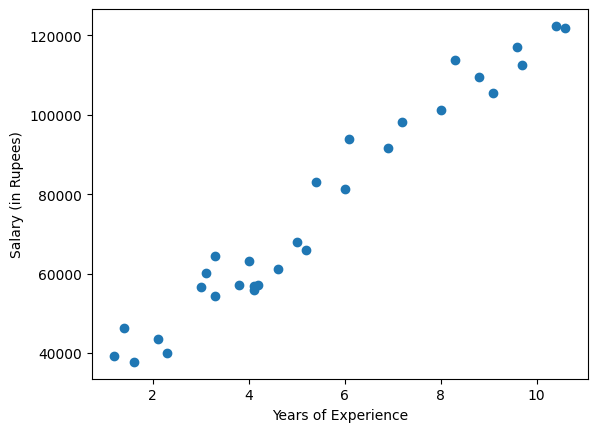

In [8]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in Rupees)')

<Axes: ylabel='count'>

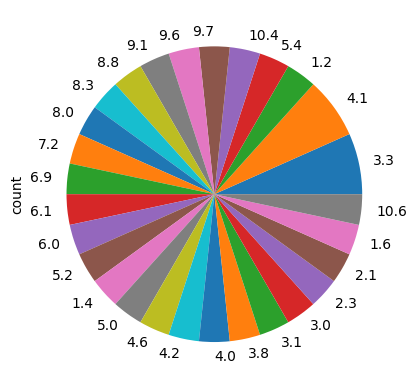

In [9]:
#print(df["YearsExperience"].value_counts())

df["YearsExperience"].round(2).value_counts().plot(kind="pie")


<Axes: >

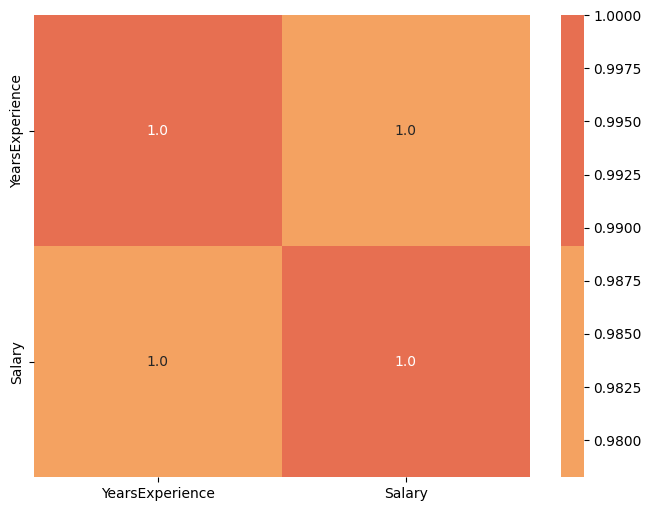

In [10]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True , fmt='.1f', cmap=['#F4A261','#E76F51'])

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Train Test Split </p>

In [11]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [12]:
X

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [13]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
X_train.shape

(24,)

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Using Linear Regression from scratch</p>


In [16]:
lr = LR_from_scratch()

In [17]:
lr.fit(X_train,y_train)

9569.586885432866
23437.21046340505


In [18]:
X_train.shape[0]

24

In [19]:
X_train[0]

8.299999999999999

In [20]:
X_train.mean()

5.754166666666666

In [21]:
X_test[0]

1.4

In [22]:
print(lr.predict(X_test[0]))

1.4
36834.632103011056


[1.4 1.2 4.6 3.8 7.2 6.1]


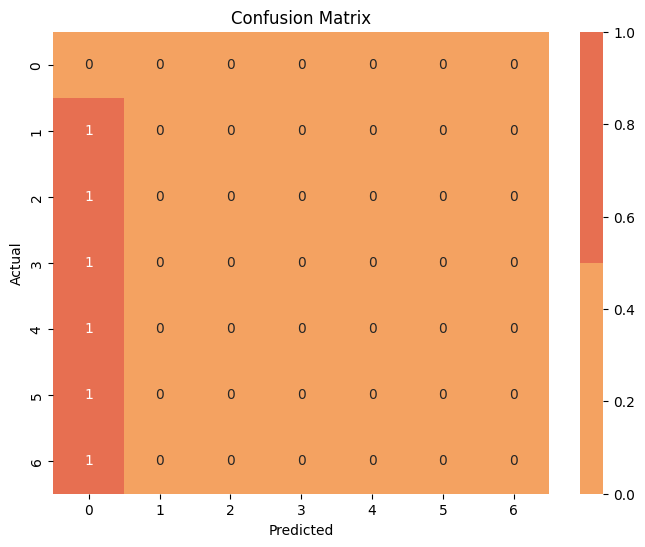

In [23]:
threshold = 0.5
y_pred = lr.predict(X_test)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#F4A261','#E76F51'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Linear Regression using sklearn </p>

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()


In [26]:
X_train = np.array(X_train).reshape(-1, 1)

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
X_train.shape[0]

24

In [29]:
X_train[0]

array([8.3])

In [30]:
X_train.mean()

5.754166666666666

In [31]:
X_test[0]

1.4

In [32]:
print(X_test[0])
print(lr.predict(np.array(X_test[0]).reshape(1, -1)))

1.4
[36834.63210301]


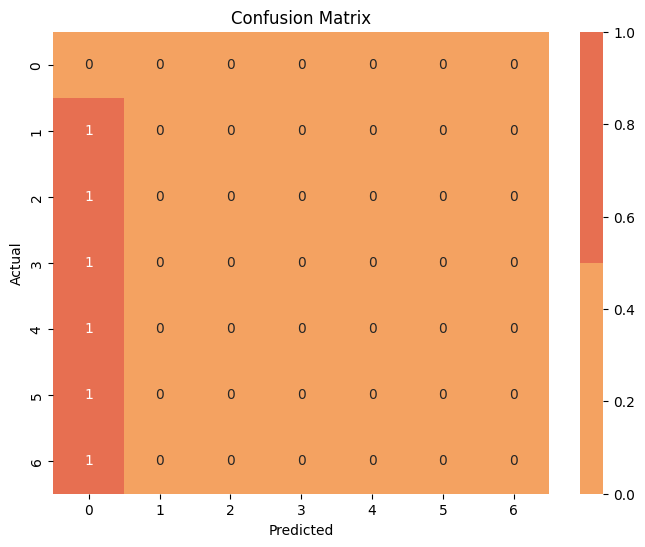

In [33]:
y_pred = lr.predict(X_test.reshape(-1,1))
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#F4A261','#E76F51'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# <p style="background-color:#B43F3F;font-family:newtimeroman;color:#F4A261;font-size:150%;text-align:center;border-radius:20px 60px;">Same Prediction</p>